<a href="https://colab.research.google.com/github/anoushkabhat13/Bioinformatics_COH_Research/blob/main/Copy_of_magtropy_vs_individual_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Current Issues

## January 21, 2021

* 1000 sequences was tested for all levels, but only realm and phylum had at least 3 sublevels with at least 1000 sequences each
  * For these levels, magtropy outperformed magnitude and entropy as individual features
* Besides Realm level and Phylum level, all other taxonomic levels have at most two sublevels with at least 1000 sequences 
    * we tested with the maximum number of sequences for each sublevel and noticed that magnitude and magtropy performed equally since the problem had become binary (magnitude works equally to magtropy in binary class problems)






## December 30, 2020

* 100 sequences is not enough to substantially test the features
* Besides Realm level and Phylum level, all other taxonomic levels have at most two sublevels with at least 1000 sequences 
    * (becomes binary problem)
    * (Subgenus level not tested yet)






# PyCaret Using Google Drive

In [ ]:
# installations
!pip install -U tensorflow-gpu==2.0.0 grpcio
!pip install pycaret
!pip install -U -q PyDrive

     |████████████████████████████████| 380.8MB 53kB/s 
     |████████████████████████████████| 4.2MB 51.1MB/s 
     |████████████████████████████████| 450kB 40.7MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 3.8MB 37.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=35cf50fdf7ce9491d2e8fb5840149cecb801a766218858a38d43ff5efa853541
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.38.1 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.

In [ ]:
# imports
import numpy as np 
import pandas as pd 
from pycaret.classification import * 

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Use for 100 sequences

In [ ]:
# Generate Dataframe of Shareable Links across all Taxonomic Levels

link = "https://drive.google.com/file/d/1SCWKXHmDLva1OQPQC2Igq3pvZL2HZ1-0/view?usp=sharing"

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('links.csv')   
  
link_df = pd.read_csv('links.csv') 
link_df = link_df.drop(columns = 'Unnamed: 0')

taxonomic_dict = link_df.set_index('Taxonomic Level').T.to_dict('Link')
print(taxonomic_dict)

{'Realm_100': ['https://drive.google.com/file/d/1hoG_IF8r8mddW_a_xt6psWcuM5ysa_ja/view?usp=sharing'], 'Kingdom_100': ['https://drive.google.com/file/d/1YAPBOSwpgQITNlyx4n32onGuWHQDB8-k/view?usp=sharing'], 'Phylum_100': ['https://drive.google.com/file/d/1RcNamj_tEVUBK6Gj71dpKOevytuQqHfL/view?usp=sharing'], 'Class_100': ['https://drive.google.com/file/d/1R1q_Upd-okMwNXzDNb9g3xYFj1CZI1OR/view?usp=sharing'], 'Order_100': ['https://drive.google.com/file/d/1bz903RLi71wxn6mDFUjF6Sl6RVfkFX4S/view?usp=sharing'], 'Suborder_100': ['https://drive.google.com/file/d/1yzIgOPHeWWSaAkmiS4py5gXgk_V7ilOT/view?usp=sharing'], 'Subfamily_100': ['https://drive.google.com/file/d/18VGLBzAmId7eZKCnDgx_YPsUvdZdsLV0/view?usp=sharing'], 'Genus_100': ['https://drive.google.com/file/d/1_VJPSJlq_0BuZ-E1YEZw9181C-TTspKT/view?usp=sharing'], 'Subgenus_100': ['https://drive.google.com/file/d/1cJ5Ot8Utsb5lE99SBgMgK1LN_kH93nGa/view?usp=sharing']}


In [ ]:
# Generating Dataframe for Specific Taxonomic Level
taxonomic_level = input("Taxonomic Level: ")
taxonomic_level = f"{taxonomic_level}_100"

link = taxonomic_dict[taxonomic_level][0]

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile(f'{taxonomic_level}.csv')   
  
df = pd.read_csv(f'{taxonomic_level}.csv') 
# taxonomic_df = taxonomic_df.drop(columns = 'Unnamed: 0')

print(df)

# Use for everything else

In [ ]:
# Generating Dataframe for taxonomic level MANUAL
link = "https://drive.google.com/file/d/1-prHT1UDHWwBhZKkrrhasmw2Fp7JsnCO/view?usp=sharing"
 
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile("Realm_100.csv")   
  
df = pd.read_csv('Realm_100.csv')
df = df.drop(columns = 'Unnamed: 0') 
print(df)

In [ ]:
# Generating Dataframe for COVID-19 Sequences
covid_link = "https://drive.google.com/file/d/1xq6pS4JoEkqmDLJ0UbD41sVCGcRwUlU1/view?usp=sharing"
 
# to get the id part of the file 
id = covid_link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Covid-19.csv')   
  
covid_19_df = pd.read_csv('Covid-19.csv')
#covid_19_df = covid_19_df.drop(columns = 'Unnamed: 0') 
print(covid_19_df)

   Sublevel Name  pp_magtropy  pp_avg_magnitude   entropy
0  Coronavirinae   104.613488        143.035656  1.367277
1    Torovirinae   110.783277        149.170135  1.346504


In [ ]:
df_PP = df.drop(columns = ["EIIP_magtropy", "EIIP_avg_magnitude"])
df_EIIP = df.drop(columns = ["PP_magtropy", "PP_avg_magnitude"])

# PP Magtropy



In [ ]:
magtropy_df = df.drop(columns = ["pp_avg_magnitude", "entropy"])
print(magtropy_df)

In [ ]:
experiment = setup(data=magtropy_df, target='Sublevel Name', experiment_name='PP_magtropy', log_experiment=True) 
# if the error states target is not defined, change from Sublevel_Name to Sublevel Name or vice versa
# label encodings alphabetical
# Duplornaviricota: 0
# Kitrinoviricota: 1
# Negarnaviricota: 2
# Pisuviricota: 3

In [ ]:
compare_models()

In [ ]:
estimator = create_model('lr') 

In [ ]:
plot_model(estimator, 'confusion_matrix')

In [ ]:
plot_model(estimator, 'class_report')

In [ ]:
magtropy_Covid_df = covid_19_df.drop(columns = ["pp_avg_magnitude", "entropy"])
print(magtropy_Covid_df)

   Sublevel Name  pp_magtropy
0  Coronavirinae   104.613488
1    Torovirinae   110.783277


In [ ]:
X_test = magtropy_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[1 1]
2


In [ ]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[1]
 [2]]


In [ ]:
logs = get_losts(experiment_name = 'PP_magtropy', save=True)
files.download('f"{taxonomic_level}_PP_magtropy.csv')

# Magnitude avg


In [ ]:
avg_magnitude_df = df.drop(columns = ["pp_magtropy", "entropy"])
print(avg_magnitude_df)

           Sublevel Name  pp_avg_magnitude
0     Orthocoronavirinae        151.787856
1     Orthocoronavirinae        145.555322
2     Orthocoronavirinae        152.056449
3     Orthocoronavirinae        151.327167
4     Orthocoronavirinae        145.146188
...                  ...               ...
1019       Coronavirinae        150.330616
1020       Coronavirinae        150.950890
1021       Coronavirinae        143.341562
1022       Coronavirinae        143.170470
1023       Coronavirinae        149.383922

[1024 rows x 2 columns]


In [ ]:
experiment = setup(data=avg_magnitude_df, target='Sublevel Name') 

,Description,Value
0,session_id,3290
1,Target,Sublevel Name
2,Target Type,Multiclass
3,Label Encoded,"Coronavirinae: 0, Orthocoronavirinae: 1, Torov..."
4,Original Data,"(1024, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9819,0.1329,0.8,0.9738,0.9826,0.0,0.0,0.043
knn,K Neighbors Classifier,0.9819,0.2662,0.8,0.9738,0.9826,0.0,0.0,0.120
svm,SVM - Linear Kernel,0.9819,0.0000,0.8,0.9738,0.9826,0.0,0.0,0.339
ridge,Ridge Classifier,0.9819,0.0000,0.8,0.9738,0.9826,0.0,0.0,0.021
lda,Linear Discriminant Analysis,0.9819,0.1148,0.8,0.9738,0.9826,0.0,0.0,0.281


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3290, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
estimator = create_model('lr') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9861,0.0000,1.0000,0.9861,0.9930,0.0,0.0
1,0.9861,0.0000,1.0000,0.9861,0.9930,0.0,0.0
2,0.9861,0.0000,1.0000,0.9861,0.9930,0.0,0.0
3,0.9722,0.2787,0.3333,0.9452,0.9585,0.0,0.0
4,0.9722,0.4934,0.3333,0.9452,0.9585,0.0,0.0
5,0.9722,0.5569,0.3333,0.9452,0.9585,0.0,0.0
6,0.9859,0.0000,1.0000,0.9859,0.9929,0.0,0.0
7,0.9859,0.0000,1.0000,0.9859,0.9929,0.0,0.0
8,0.9859,0.0000,1.0000,0.9859,0.9929,0.0,0.0
9,0.9859,0.0000,1.0000,0.9859,0.9929,0.0,0.0


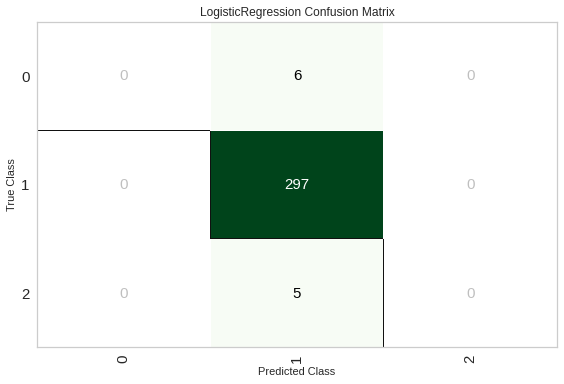

In [ ]:
plot_model(estimator, 'confusion_matrix')

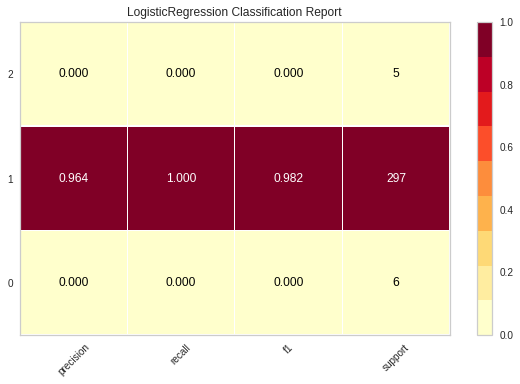

In [ ]:
plot_model(estimator, 'class_report')

In [ ]:
magnitude_avg_Covid_df = covid_19_df.drop(columns = ["pp_magtropy", "entropy"])
print(magnitude_avg_Covid_df )

   Sublevel Name  pp_avg_magnitude
0  Coronavirinae        143.035656
1    Torovirinae        149.170135


In [ ]:
X_test = magnitude_avg_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[1 1]
2


In [ ]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[1]
 [2]]


# Entropy


In [ ]:
entropy_df = df.drop(columns = ["pp_magtropy","pp_avg_magnitude"])
print(entropy_df)

           Sublevel Name   entropy
0     Orthocoronavirinae  1.366947
1     Orthocoronavirinae  1.350225
2     Orthocoronavirinae  1.367575
3     Orthocoronavirinae  1.368703
4     Orthocoronavirinae  1.364494
...                  ...       ...
1020       Coronavirinae  1.366169
1021       Coronavirinae  1.369778
1022       Coronavirinae  1.351369
1023       Coronavirinae  1.352080
1024       Coronavirinae  1.369383

[1025 rows x 2 columns]


In [ ]:
experiment = setup(data=entropy_df, target='Sublevel Name') 

,Description,Value
0,session_id,2928
1,Target,Sublevel Name
2,Target Type,Multiclass
3,Label Encoded,"Coronavirinae: 0, Orthocoronavirinae: 1, Torov..."
4,Original Data,"(1025, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9763,0.7289,0.5324,0.9593,0.9683,0.2461,0.2590,0.128
lr,Logistic Regression,0.9735,0.6209,0.4000,0.9491,0.9619,0.0000,0.0000,0.035
nb,Naive Bayes,0.9735,0.6332,0.4000,0.9491,0.9619,0.0000,0.0000,0.021
svm,SVM - Linear Kernel,0.9735,0.0000,0.4000,0.9491,0.9619,0.0000,0.0000,0.065
ridge,Ridge Classifier,0.9735,0.0000,0.4000,0.9491,0.9619,0.0000,0.0000,0.019
qda,Quadratic Discriminant Analysis,0.9735,0.6372,0.4000,0.9491,0.9619,0.0000,0.0000,0.022
dt,Decision Tree Classifier,0.9708,0.6429,0.6619,0.9694,0.9705,0.4097,0.4250,0.024
rf,Random Forest Classifier,0.9708,0.7306,0.6619,0.9694,0.9705,0.4097,0.4250,0.502
gbc,Gradient Boosting Classifier,0.9708,0.7217,0.6619,0.9694,0.9705,0.4097,0.4250,0.285
et,Extra Trees Classifier,0.9708,0.6876,0.6619,0.9694,0.9705,0.4097,0.4250,0.725


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
estimator = create_model('knn') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9861,0.9931,0.6667,0.9724,0.9792,0.6620,0.7046
1,0.9722,0.7218,0.3333,0.9452,0.9585,0.0000,0.0000
2,0.9722,0.9756,0.3333,0.9452,0.9585,0.0000,0.0000
3,0.9583,0.4789,0.3286,0.9448,0.9515,-0.0141,-0.0150
4,0.9722,0.7289,0.3333,0.9452,0.9585,0.0000,0.0000
5,0.9861,0.9788,0.6667,0.9724,0.9792,0.6620,0.7046
6,0.9722,0.4437,0.3333,0.9452,0.9585,0.0000,0.0000
7,0.9859,0.0000,1.0000,0.9859,0.9929,0.0000,0.0000
8,0.9859,0.9893,0.6667,0.9720,0.9789,0.6619,0.7046
9,0.9718,0.9787,0.6618,0.9648,0.9671,0.4892,0.4910


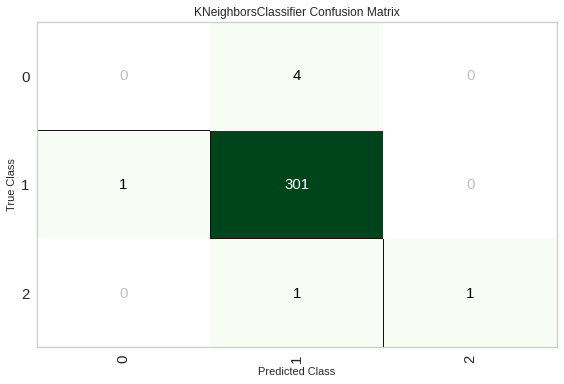

In [ ]:
plot_model(estimator, 'confusion_matrix')

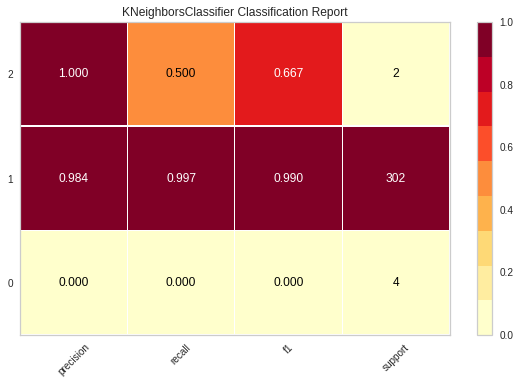

In [ ]:
plot_model(estimator, 'class_report')

In [ ]:
entropy_Covid_df = covid_19_df.drop(columns = ["pp_avg_magnitude", "pp_magtropy"])
print(entropy_Covid_df)

   Sublevel Name   entropy
0          COVID  1.358746
1          COVID  1.356545
2          COVID  1.356516
3          COVID  1.360071
4          COVID  1.356583
..           ...       ...
95         COVID  1.356622
96         COVID  1.356466
97         COVID  1.356597
98         COVID  1.356579
99         COVID  1.356607

[100 rows x 2 columns]


In [ ]:
X_test =entropy_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
100


In [ ]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[  1]
 [100]]
